In [1]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibrd-loan-statements/IBRD_Statement_of_Loans_-_Latest_Available_Snapshot.csv


In [3]:
# Load Data
ibrd_df = pd.read_csv("/kaggle/input/ibrd-loan-statements/IBRD_Statement_of_Loans_-_Latest_Available_Snapshot.csv")

In [4]:
# Check Data
ibrd_df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,12/31/2022 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,...,2.499620e+08,0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,12/31/2022 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,8.767200e+07,0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,12/31/2022 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,3.955788e+06,0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,12/31/2022 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,...,2.222900e+07,0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,12/31/2022 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,...,1.014200e+07,0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


# *Data Process* 
* **Data Shape**
* **Data Head/Sample**
* **Data Types**
* **Missing Values**
* **Describe Data**
* **Data Duplicates**
* **Data Correlation**

In [5]:
# Rows and Columns in Dataset
print(f'Dataset (rows, col): {ibrd_df.shape}')

Dataset (rows, col): (8950, 33)


In [6]:
# Data Types
print('Numerical Data:\n') 
ibrd_df.select_dtypes('number').info()

Numerical Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Interest Rate              8857 non-null   float64
 1   Currency of Commitment     0 non-null      float64
 2   Original Principal Amount  8950 non-null   float64
 3   Cancelled Amount           8950 non-null   float64
 4   Undisbursed Amount         8950 non-null   float64
 5   Disbursed Amount           8950 non-null   float64
 6   Repaid to IBRD             8950 non-null   float64
 7   Due to IBRD                8950 non-null   float64
 8   Exchange Adjustment        8950 non-null   float64
 9   Borrower's Obligation      8950 non-null   float64
 10  Sold 3rd Party             8950 non-null   float64
 11  Repaid 3rd Party           8950 non-null   float64
 12  Due 3rd Party              8950 non-null   int64  
 13  Loans Held                 8950

In [7]:
print('Categorical Data:\n') 
ibrd_df.select_dtypes('object').info()

Categorical Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   End of Period                 8950 non-null   object
 1   Loan Number                   8950 non-null   object
 2   Region                        8950 non-null   object
 3   Country Code                  8948 non-null   object
 4   Country                       8950 non-null   object
 5   Borrower                      8893 non-null   object
 6   Guarantor Country Code        8668 non-null   object
 7   Guarantor                     8670 non-null   object
 8   Loan Type                     8950 non-null   object
 9   Loan Status                   8950 non-null   object
 10  Project ID                    8950 non-null   object
 11  Project Name                  8950 non-null   object
 12  First Repayment Date          8909 non-null   object
 13 

In [8]:
# Missing Values
print(f'\nMissing Values in Dataset:\n\n{ibrd_df.isnull().sum()}')


Missing Values in Dataset:

End of Period                      0
Loan Number                        0
Region                             0
Country Code                       2
Country                            0
Borrower                          57
Guarantor Country Code           282
Guarantor                        280
Loan Type                          0
Loan Status                        0
Interest Rate                     93
Currency of Commitment          8950
Project ID                         0
Project Name                       0
Original Principal Amount          0
Cancelled Amount                   0
Undisbursed Amount                 0
Disbursed Amount                   0
Repaid to IBRD                     0
Due to IBRD                        0
Exchange Adjustment                0
Borrower's Obligation              0
Sold 3rd Party                     0
Repaid 3rd Party                   0
Due 3rd Party                      0
Loans Held                         0
First Rep

In [9]:
# Duplicates 
print(f'Duplicates in Dataset: {ibrd_df.duplicated().sum()}')

Duplicates in Dataset: 0


In [10]:
# Description  of Data
ibrd_df.describe(include=['object', 'number'])

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
count,8950,8950,8950,8948,8950,8893,8668,8670,8950,8950,...,8.950000e+03,8950.0,8.950000e+03,8909,8910,8802,8950,8862,8942,5433
unique,1,8950,7,146,147,940,125,126,11,11,...,NaN,NaN,NaN,1593,1683,4758,3313,5495,1212,3674
top,12/31/2022 12:00:00 AM,IBRD00010,LATIN AMERICA AND CARIBBEAN,ID,Indonesia,MINISTRY OF FINANCE,ID,Indonesia,FSL,Fully Repaid,...,NaN,NaN,NaN,09/15/1998 12:00:00 AM,01/15/2001 12:00:00 AM,07/06/2009 12:00:00 AM,06/25/1991 12:00:00 AM,07/06/2009 12:00:00 AM,06/30/1999 12:00:00 AM,07/06/2009 12:00:00 AM
freq,8950,1,2808,642,642,1250,642,642,2368,6380,...,NaN,NaN,NaN,79,48,20,25,20,117,28
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.107216e+05,0.0,3.540736e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.720891e+06,0.0,1.179038e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.0,-1.483090e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation in Dataset\n')

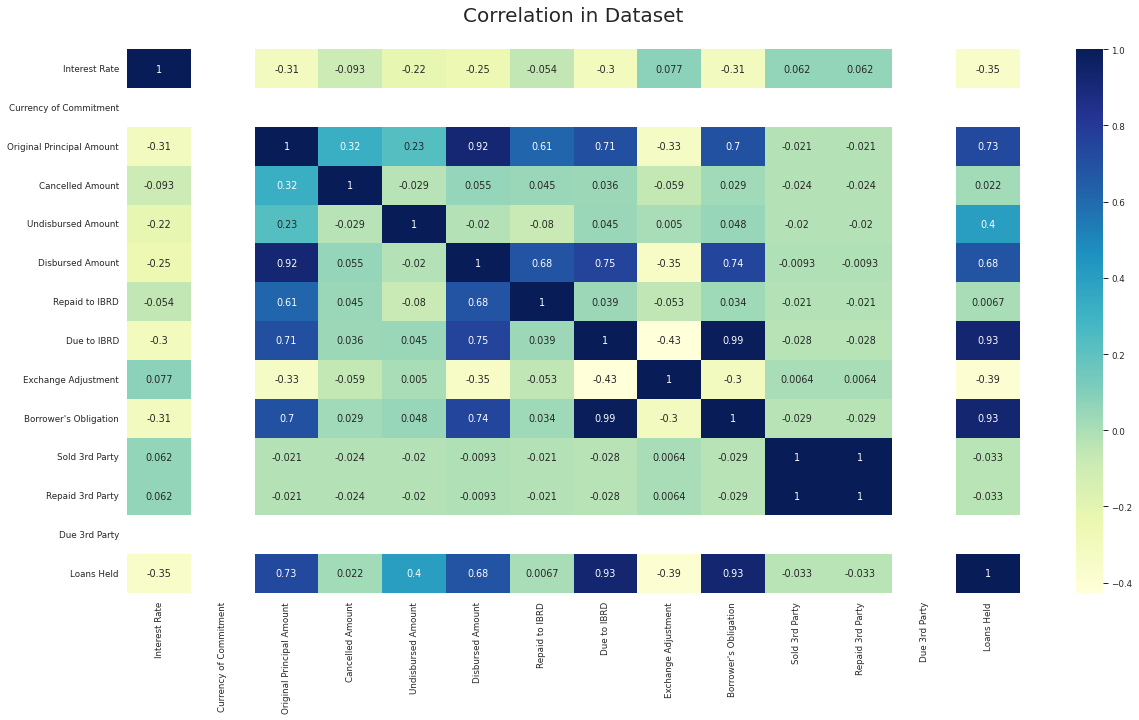

In [11]:
# Correlations in Dataset
plt.figure(figsize=(20,10))
ax = sns.heatmap(ibrd_df.corr(), annot=True, cmap='YlGnBu')
ax.set_title("Correlation in Dataset\n", fontsize=20)

# About Data 
#### This Dataset consist **8950 rows** and **33 columns**.

### **Data Types**
#### This Dataset contains **14 Numrical Data and 19 Categorical Data**

### **Missing Values**
    #### Country Code                       2
    #### Borrower                          57
    #### Guarantor Country Code           282
    #### Guarantor                        280
    #### Interest Rate                     93
    #### Currency of Commitment          8950
    #### First Repayment Date              41
    #### Last Repayment Date               40
    #### Agreement Signing Date           148
    #### Board Approval Date                0
    #### Effective Date (Most Recent)      88
    #### Closed Date (Most Recent)          8
    #### Last Disbursement Date          3517

### **Description**
#### The International Bank for Reconstruction and Development (IBRD) loans are public and publicly guaranteed debt extended by the World Bank Group. IBRD loans are made to, or guaranteed by, countries that are members of IBRD. IBRD may also make loans to IFC. IBRD lends at market rates. Data are in U.S. dollars calculated using historical rates. This dataset contains the latest available snapshot of the Statement of Loans. The World Bank complies with all sanctions applicable to World Bank transactions.



General Notes:
1. Original principal amount less cancelled amount may not equal disbursed amount plus undisbursed amount due to exchange rate movements.
2. The disbursed amount less the repaid amount may not equal the borrower’s obligation due to exchange rate movements

[DataSet Link](https://www.kaggle.com/datasets/mebiali01/ibrd-loan-statements)